# Introduction

The dataset is from Kaggle: Movie Dataset and contains information about 10,867 movies collected from The Movie Database (TMDb), including popularity, revenue, budget, cast and genres.

Asking Questions
Based on dataset, we are interested to know:

1. Does having a higher popularity associated with a higher revenue and budget?
2. Does having a higher popularity results in a higher profitability?
3. Which are the top 10 profitable movies?
4. Which are the top 10 Genres?
5. How has profitability moved year on year?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First thing first, we are going to import the important packages which are:-

1. Numpy - a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
2. Pandas - a library for the Python programming language, it offers data structures and operations for manipulating numerical tables and time series.
3. Matplotlib - Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy

In [4]:
%matplotlib inline

# Importing the dataset

In [5]:
#Loading the dataset
df= pd.read_csv('downloads/tmdb-movies.csv')

In [6]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Data Wrangling

In [7]:
#know the datatypes
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
df.shape

(10866, 21)

There are 21 columns and 10866 rows

In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
sum(df.duplicated())

1

# Observations:
1. “id”, “imdb_id” columns are similar column so we can get rid of one of them. Choosing “imdb_id” column as it's a string

2. “popularity”, “budget”, and “revenue” columns are useful for this analysis and we are going to calculate the profit

3. “original_title”, “cast”, “director” columns have useful information about the movies.

4. “homepage”, “tagline”, “keywords”, “overview”, “budget_adj”, “revenue_adj” columns are not useful for analysis so these columns could be deleted from the data frame.

5. “release_date”, and “release_year” columns also important. And we need the convert the release_date column to pandas DateTime object.

In [11]:
#drop duplicates
df.drop_duplicates(inplace=True) 

In [12]:
df.duplicated().sum()

0

In [13]:
#columns to drop
cols=['imdb_id','homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj']

In [14]:
df.drop(cols, inplace=True, axis=1)

In [15]:
df.shape

(10865, 14)

In [16]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [17]:
#Columns/variables with missing values
# %of missing values

df.isnull().sum()/len(df)*100

id                      0.000000
popularity              0.000000
budget                  0.000000
revenue                 0.000000
original_title          0.000000
cast                    0.699494
director                0.404970
runtime                 0.000000
genres                  0.211689
production_companies    9.479982
release_date            0.000000
vote_count              0.000000
vote_average            0.000000
release_year            0.000000
dtype: float64

<AxesSubplot:title={'center':'missing values'}>

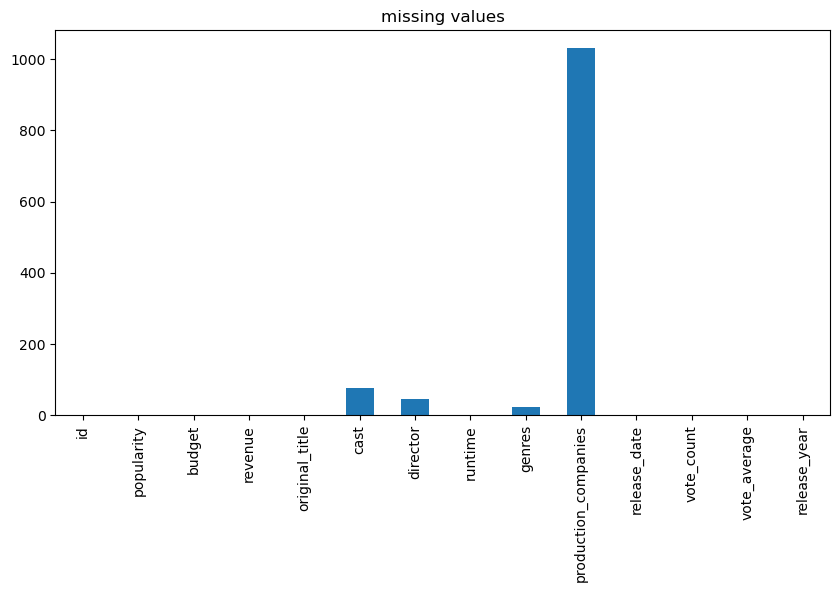

In [18]:
#Draw a frequency plot to show the number of null values in each column of the DataFrame

df.isnull().sum().plot(kind='bar', figsize=(10,5),title = 'missing values')

In [19]:
# if we keepo 20% as threshold, dropping rows which have null values
df.dropna(inplace = True)

In [20]:
df

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


In [21]:
df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [22]:
# changing columns to the right data type
df['release_date'] = pd.to_datetime(df['release_date'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9772 non-null   int64         
 1   popularity            9772 non-null   float64       
 2   budget                9772 non-null   int64         
 3   revenue               9772 non-null   int64         
 4   original_title        9772 non-null   object        
 5   cast                  9772 non-null   object        
 6   director              9772 non-null   object        
 7   runtime               9772 non-null   int64         
 8   genres                9772 non-null   object        
 9   production_companies  9772 non-null   object        
 10  release_date          9772 non-null   datetime64[ns]
 11  vote_count            9772 non-null   int64         
 12  vote_average          9772 non-null   float64       
 13  release_year     

there are rows with zero:
    1. runtime
    2. revenue
    3. budget

In [24]:
df[df['budget']==0].shape

(4751, 14)

In [25]:
df[df['budget']==0].index.values

array([   30,    36,    72, ..., 10862, 10863, 10864], dtype=int64)

In [26]:
df[df['revenue']==0].shape

(5022, 14)

In [27]:
df[df['runtime']==0].shape

(13, 14)

In [28]:
#deleting rows wherein runtime is zero 

In [29]:
df[df['runtime']==0].index.values

array([  92,  334,  445,  486, 1289, 1293, 3329, 3857, 4944, 5695, 5920,
       5938, 6934], dtype=int64)

In [30]:
df.drop(index= [92,  334,  445,  486, 1289, 1293, 3329, 3857, 4944, 5695, 5920,
       5938, 6934], inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9759 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9759 non-null   int64         
 1   popularity            9759 non-null   float64       
 2   budget                9759 non-null   int64         
 3   revenue               9759 non-null   int64         
 4   original_title        9759 non-null   object        
 5   cast                  9759 non-null   object        
 6   director              9759 non-null   object        
 7   runtime               9759 non-null   int64         
 8   genres                9759 non-null   object        
 9   production_companies  9759 non-null   object        
 10  release_date          9759 non-null   datetime64[ns]
 11  vote_count            9759 non-null   int64         
 12  vote_average          9759 non-null   float64       
 13  release_year     

In [32]:
df[df['runtime']==0]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year


# Exploratory Data Analysis

In [33]:
df

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966


In [34]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9759.000000,9759.000000,9.759000e+03,9.759000e+03,9759.000000,9759.000000,9759.000000,9759.000000
mean,62952.180859,0.695266,1.620089e+07,4.429013e+07,103.063736,239.597602,5.964535,2000.862793
std,90448.988464,1.037370,3.222692e+07,1.226599e+08,27.641529,603.361812,0.912967,13.038056
min,5.000000,0.000188,0.000000e+00,0.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10217.500000,0.232931,0.000000e+00,0.000000e+00,91.000000,18.000000,5.400000,1994.000000
50%,18632.000000,0.420185,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000
75%,70146.500000,0.777162,1.965000e+07,3.111596e+07,112.000000,173.500000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


In [35]:
for x in df.columns:
    print(x+ " "*10+" : ",df[x].unique())

id           :  [135397  76341 262500 ...  39768  21449  22293]
popularity           :  [32.985763 28.419936 13.112507 ...  0.065141  0.064317  0.035919]
budget           :  [150000000 110000000 200000000 190000000 135000000 155000000 108000000
  74000000 175000000 245000000 176000003  15000000  88000000 280000000
  44000000  48000000 130000000  95000000 160000000  30000000  40000000
  28000000  68000000  81000000  20000000  61000000         0  49000000
  29000000  58000000   6000000  50000000  11000000  90000000  75000000
  25000000  10000000  12000000   4000000  11800000  35000000  55000000
  60000000 105000000  26000000  70000000 120000001   3500000  65000000
  50100000 100000000  13000000  99000000   2500000  34000000  80000000
  17000000  31000000   5000000  64000000  11930000   8500000  23000000
  53000000   8900000    700000  14800000  19500000   1000000   8000000
   1800000   2000000  18000000    630019  14000000  37000000   7000000
   3000000   9600000   2240000   3300000    1

## 1. Does having a higher popularity associated with a higher revenue and budget?

In [36]:
df['profit'] = df['revenue']-df['budget']

In [37]:
df['popularity_levels']= pd.cut(x=df['popularity'], bins=[0,0.23, 0.42, 0.77, 33], labels=['low', 'mod_low', 'medium', 'high'])

In [38]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit,popularity_levels
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810,high
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354,high
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201,high
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225,high
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360,high


In [39]:
df['popularity_levels'].value_counts()

mod_low    2481
high       2470
medium     2412
low        2396
Name: popularity_levels, dtype: int64

In [40]:
df.groupby(by='popularity_levels')['revenue'].agg(['mean'])

,mean
popularity_levels,
low,3.538604e+06
mod_low,6.812291e+06
medium,2.227741e+07
high,1.429613e+08


In [83]:
def hist_plot_by(x, xlabel, ylabel, title):
    ax = plt.subplot(1,1,1)
    ax.hist(x)
    plt.title('Runtime Spread')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


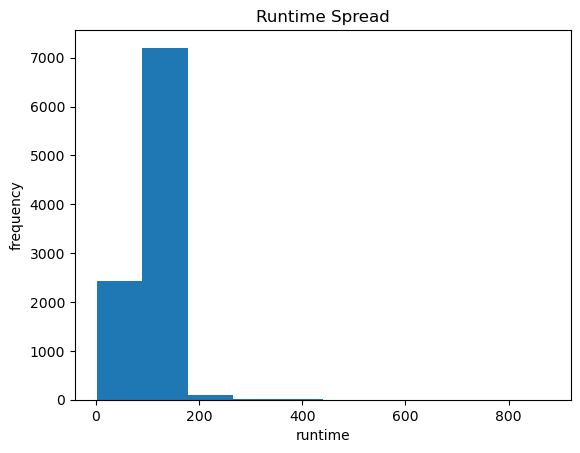

In [84]:
hist_plot_by(df['runtime'], 'runtime', 'frequency','Runtime spread')


Text(0.5, 1.0, 'Popularity Levels vs Revenue')

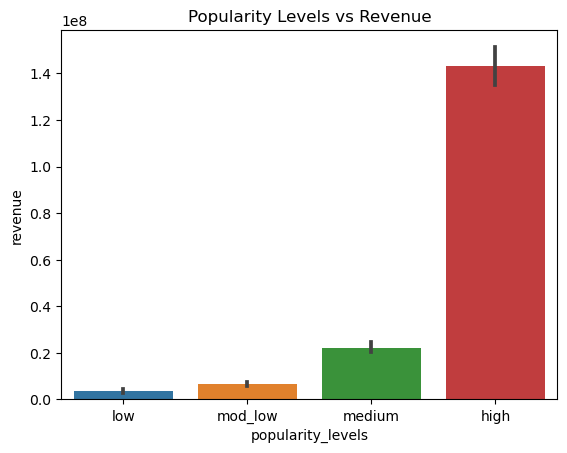

In [41]:
sns.barplot(x='popularity_levels', y= 'revenue', data= df)
plt.title('Popularity Levels vs Revenue')

#### This shows that highly popular films tend to earn more

In [42]:
df.groupby(by='popularity_levels')['budget'].agg(['mean'])

,mean
popularity_levels,
low,2.845054e+06
mod_low,5.684503e+06
medium,1.281215e+07
high,4.302898e+07


Text(0.5, 1.0, 'Popularity Levels vs Budget')

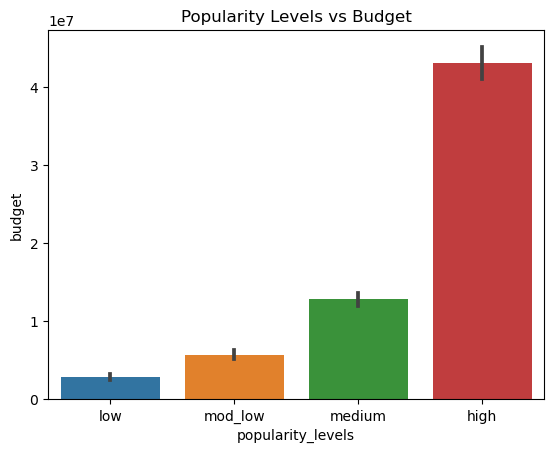

In [43]:
sns.barplot(x='popularity_levels', y= 'budget', data= df)
plt.title('Popularity Levels vs Budget')

#### This shows that highly popular films tend to have more budgets

In [44]:
df.groupby(by='popularity_levels')['profit'].agg(['mean'])

,mean
popularity_levels,
low,6.935505e+05
mod_low,1.127788e+06
medium,9.465267e+06
high,9.993235e+07


Text(0.5, 1.0, 'Popularity Levels vs Profit')

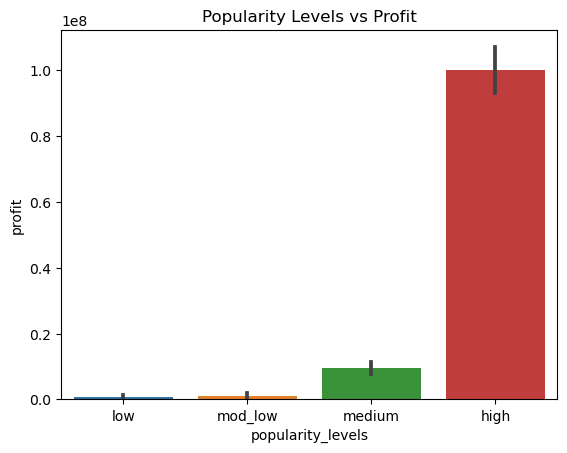

In [45]:
sns.barplot(x='popularity_levels', y= 'profit', data= df)
plt.title('Popularity Levels vs Profit')

#### This shows that highly popular films tend to have more profit

Text(0.5, 1.0, 'Budget vs Profit scatterplot')

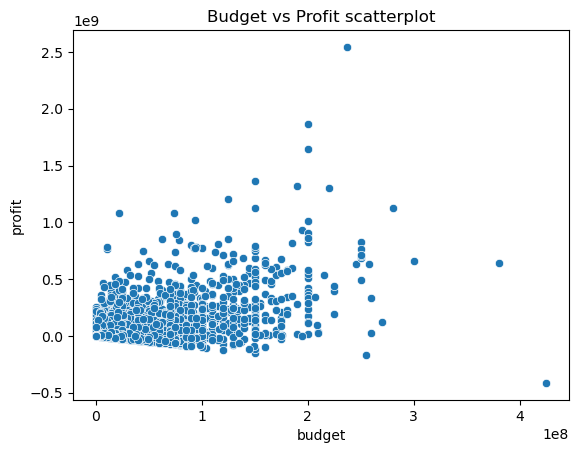

In [46]:
sns.scatterplot(x='budget', y= 'profit', data= df)
plt.title('Budget vs Profit scatterplot')

#### Budget leads to increase in profitability

Text(0.5, 1.0, 'Popularity vs Budget scatterplot')

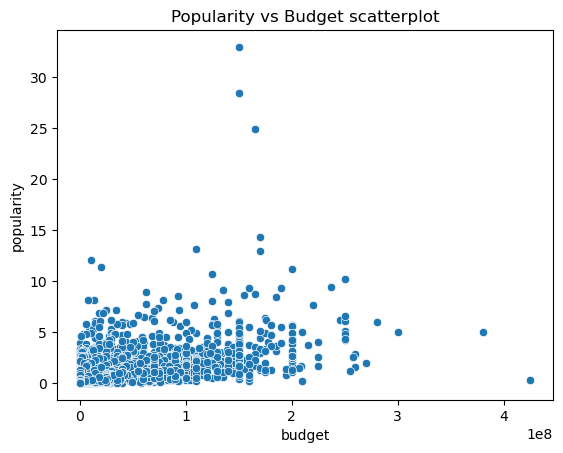

In [47]:
sns.scatterplot(x='budget', y= 'popularity', data= df)
plt.title('Popularity vs Budget scatterplot')

#### Budget leads to increase in Popularity

Text(0.5, 1.0, 'Popularity vs Revenue scatterplot')

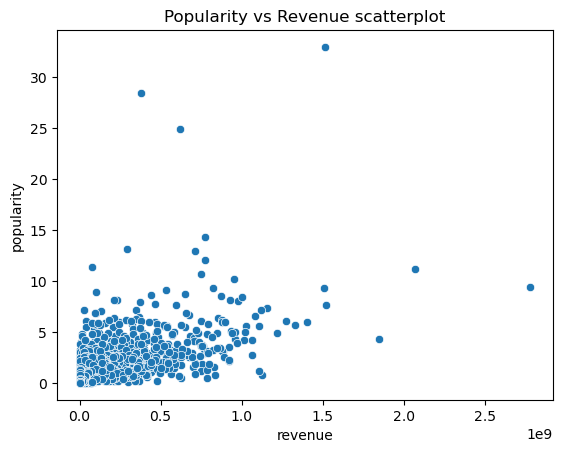

In [48]:
sns.scatterplot(x='revenue', y= 'popularity', data= df)
plt.title('Popularity vs Revenue scatterplot')

#### Revenue increases with increase in Popularity

In [49]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit,popularity_levels
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810,high
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354,high
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201,high
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225,high
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360,high


# 2. Does having a higher popularity results in a Profitability?

In [50]:
df['budget']=df['budget'].apply(lambda x: x/1000000)

In [51]:
df['revenue']=df['revenue'].apply(lambda x: x/1000000)

In [52]:
df['profit']=df['profit'].apply(lambda x: x/1000000)

In [53]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit,popularity_levels
0,135397,32.985763,150.0,1513.528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363.528810,high
1,76341,28.419936,150.0,378.436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228.436354,high
2,262500,13.112507,110.0,295.238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185.238201,high
3,140607,11.173104,200.0,2068.178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868.178225,high
4,168259,9.335014,190.0,1506.249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316.249360,high


In [54]:
df['profit'].describe()

count    9759.000000
mean       28.089242
std       101.506817
min      -413.912431
25%         0.000000
50%         0.000000
75%        14.276390
max      2544.505847
Name: profit, dtype: float64

In [55]:
df['profitable']= pd.cut(x=df['profit'], bins=[-414, 0, 14.2, 2545], labels=['loss', 'medium_profit', 'high_profit'])

In [56]:
df['profitable'].value_counts(dropna=False)

loss             6058
high_profit      2444
medium_profit    1257
Name: profitable, dtype: int64

In [57]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit,popularity_levels,profitable
0,135397,32.985763,150.0,1513.528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363.528810,high,high_profit
1,76341,28.419936,150.0,378.436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228.436354,high,high_profit
2,262500,13.112507,110.0,295.238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185.238201,high,high_profit
3,140607,11.173104,200.0,2068.178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868.178225,high,high_profit
4,168259,9.335014,190.0,1506.249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316.249360,high,high_profit


In [58]:
#crosstab
pd.crosstab(index=df['popularity_levels'], columns= df['profitable'], margins=True, normalize=True).style.format('{:.2%}')

profitable,loss,medium_profit,high_profit,All
popularity_levels,,,,
low,21.16%,2.36%,1.03%,24.55%
mod_low,19.70%,3.49%,2.22%,25.42%
medium,15.09%,4.19%,5.43%,24.72%
high,6.12%,2.84%,16.35%,25.31%
All,62.08%,12.88%,25.04%,100.00%


#### higly profitable movies have high populatiy levels. 15% of loss making movies are medium popular

## 3. Which are the top 10 profitable movies?

In [59]:
profitdf=df.sort_values(by=['profit'], ascending=False).head(10)

In [60]:
profitdf

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit,popularity_levels,profitable
1386,19995,9.432768,237.0,2781.505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2544.505847,high,high_profit
3,140607,11.173104,200.0,2068.178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868.178225,high,high_profit
5231,597,4.355219,200.0,1845.034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,1645.034188,high,high_profit
0,135397,32.985763,150.0,1513.528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363.528810,high,high_profit
4,168259,9.335014,190.0,1506.249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316.249360,high,high_profit
4361,24428,7.637767,220.0,1519.557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,1299.557910,high,high_profit
3374,12445,5.711315,125.0,1327.817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7.7,2011,1202.817822,high,high_profit
14,99861,5.944927,280.0,1405.035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,1125.035767,high,high_profit
5422,109445,6.112766,150.0,1274.219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013-11-27,3369,7.5,2013,1124.219009,high,high_profit
8094,1642,1.136610,22.0,1106.279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,1995-07-28,201,5.6,1995,1084.279658,high,high_profit


Text(0.5, 1.0, 'Top 10 profitable movies')

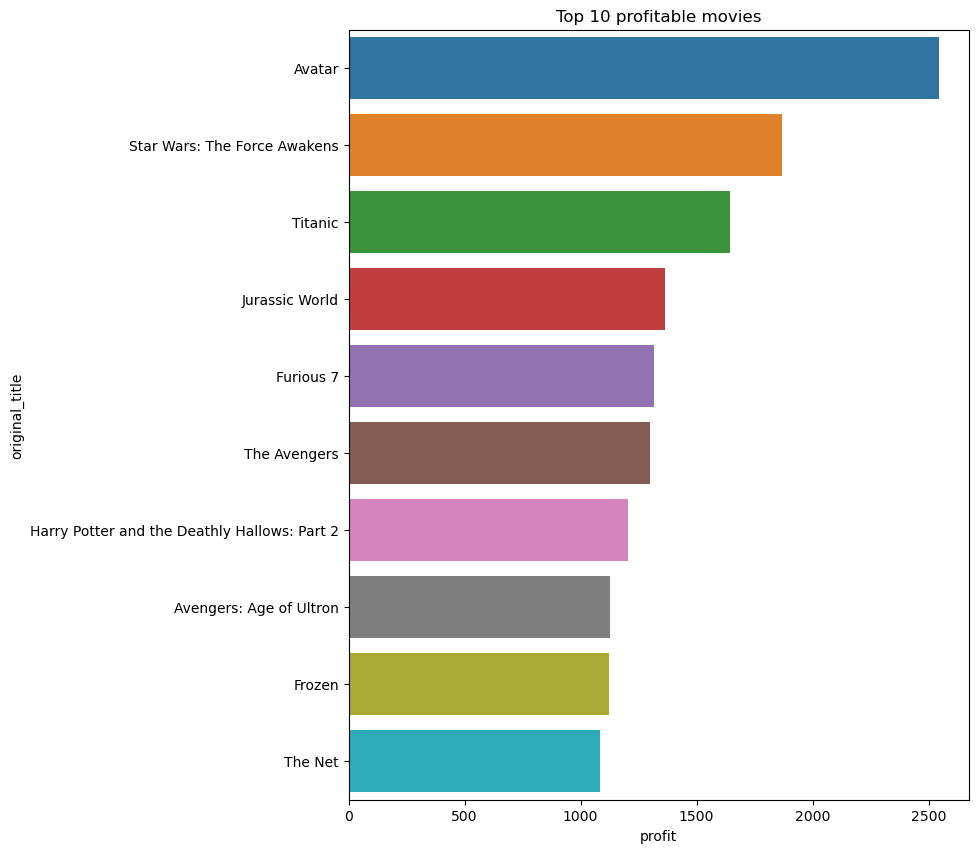

In [61]:
fig, axes= plt.subplots(figsize= (8,10))
sns.barplot(x='profit', y= 'original_title', data= profitdf)
#top 10 profitable movies
plt.title('Top 10 profitable movies')

In [62]:
profitdf['original_title'].to_frame()

,original_title
1386,Avatar
3,Star Wars: The Force Awakens
5231,Titanic
0,Jurassic World
4,Furious 7
4361,The Avengers
3374,Harry Potter and the Deathly Hallows: Part 2
14,Avengers: Age of Ultron
5422,Frozen
8094,The Net


## 4. Which are the top 10 Genres?

Text(0.5, 1.0, 'Top 10 Genres')

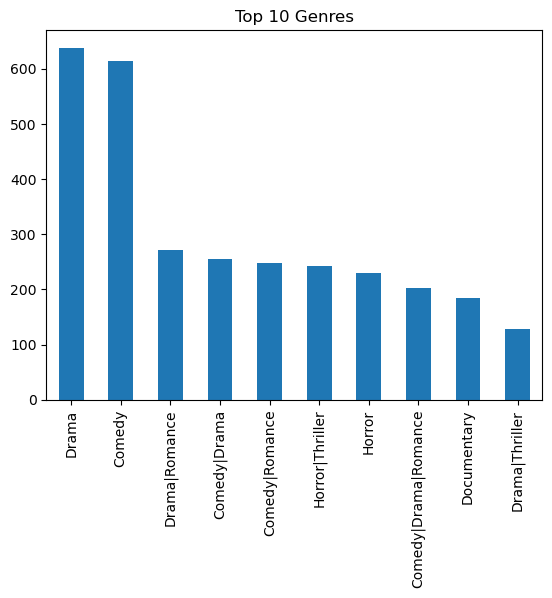

In [63]:
df['genres'].value_counts().head(10).plot(kind='bar')
#top 10 genres
plt.title('Top 10 Genres')

#### Drama is the most popular genre, following by action, comedy and thriller. 

## 5. How has profitability moved year on year?

Text(0.5, 1.0, 'Year wise profit barchart')

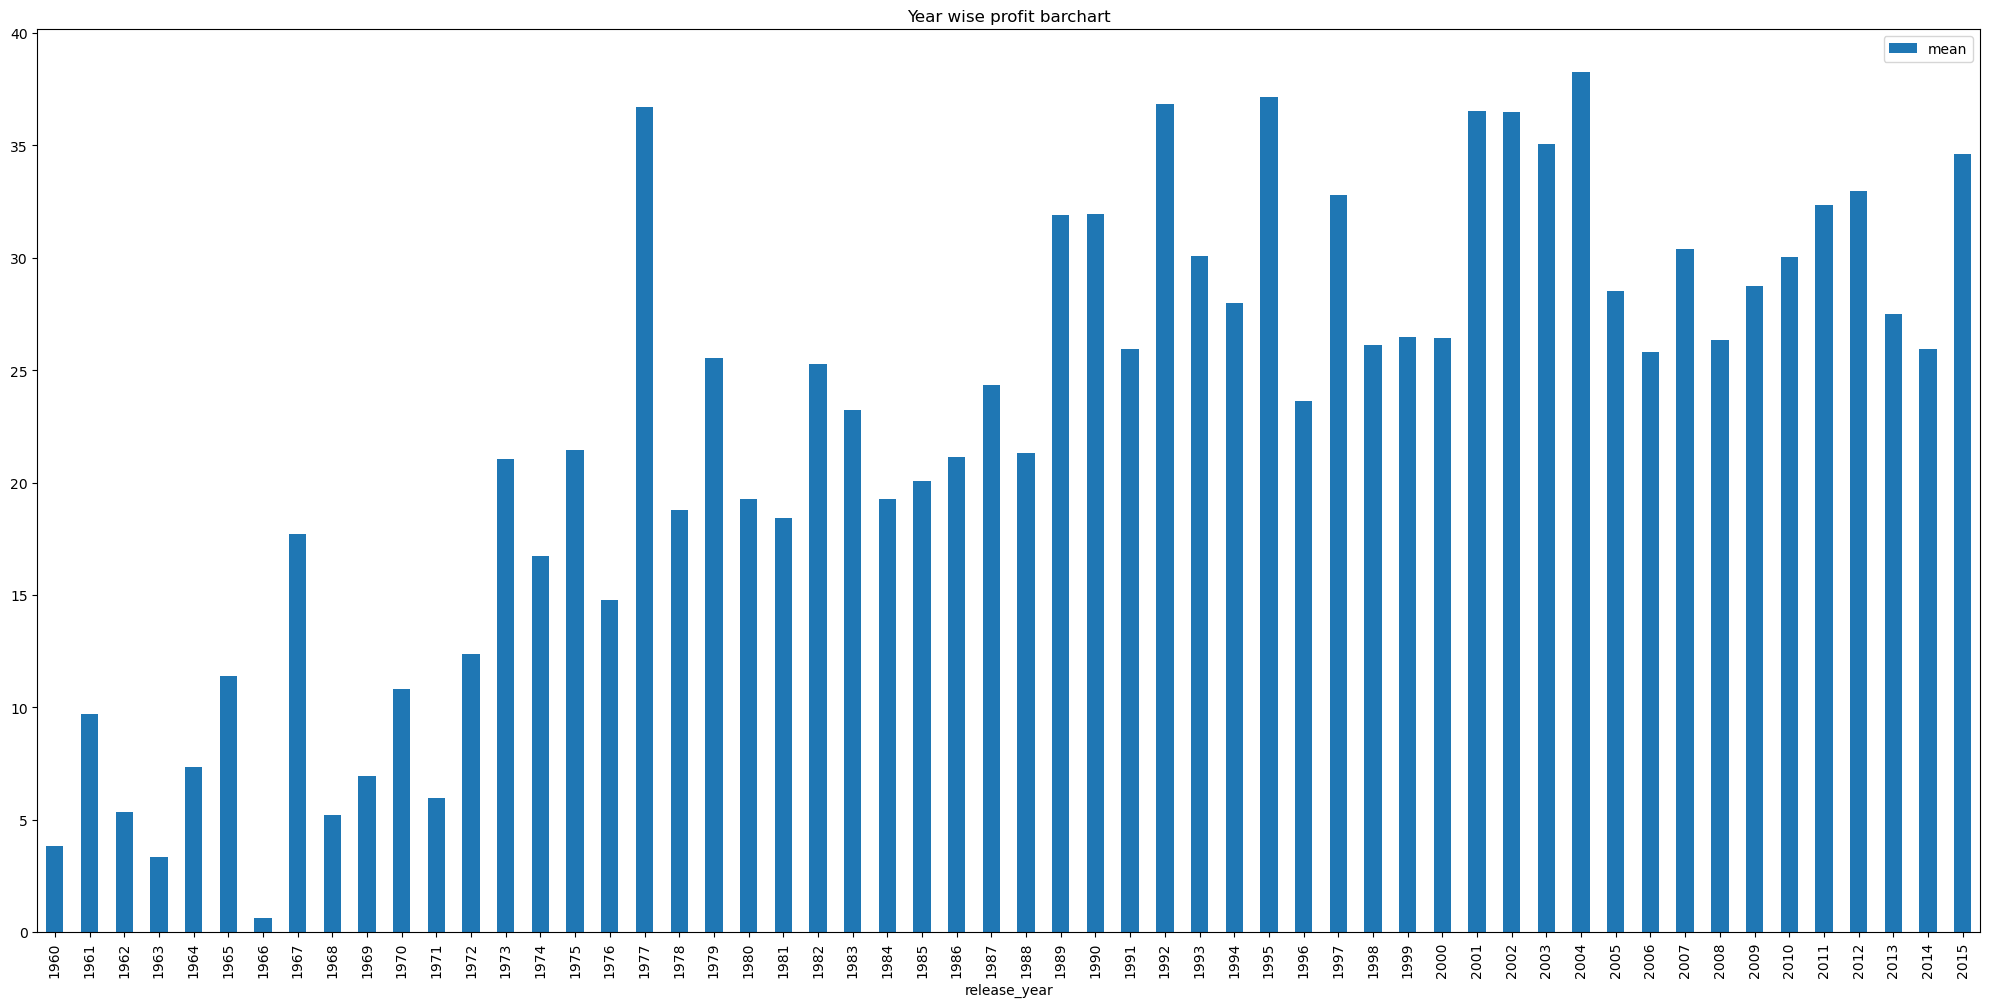

In [64]:
df.groupby(by='release_year')['profit'].agg(['mean']).plot(kind='bar', figsize=(20,10))
plt.tight_layout()
plt.title('Year wise profit barchart')

#### Profitability peaked in 2004 and has been decreading with slight rise in 2012 and 2015

In [65]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
id,1.000000,0.002964,-0.135736,-0.094750,-0.089280,-0.026114,-0.087215,0.508907,-0.071400
popularity,0.002964,1.000000,0.538882,0.662434,0.155808,0.803034,0.238903,0.111466,0.629391
budget,-0.135736,0.538882,1.000000,0.731149,0.213844,0.626989,0.095627,0.138933,0.566028
revenue,-0.094750,0.662434,0.731149,1.000000,0.183206,0.788497,0.191816,0.072219,0.976262
runtime,-0.089280,0.155808,0.213844,0.183206,1.000000,0.184232,0.191821,-0.130630,0.153491
vote_count,-0.026114,0.803034,0.626989,0.788497,0.184232,1.000000,0.279720,0.125233,0.753753
vote_average,-0.087215,0.238903,0.095627,0.191816,0.191821,0.279720,1.000000,-0.139250,0.201429
release_year,0.508907,0.111466,0.138933,0.072219,-0.130630,0.125233,-0.139250,1.000000,0.043159
profit,-0.071400,0.629391,0.566028,0.976262,0.153491,0.753753,0.201429,0.043159,1.000000


Text(0.5, 1.0, 'Heatmap for features')

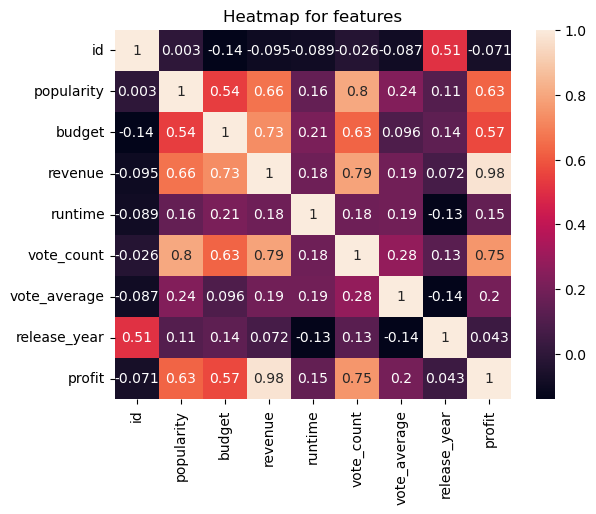

In [66]:
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap for features')

1. Popularity and vote_count are strongly correlated
2. Revenue and vote_count are strongly correlated

## Conclusion

1. Does having a higher popularity associated with a higher revenue and budget?
Analysis shows that highly popular films tend to have more budgets and revenue
2. Does having a higher popularity results in a higher profitability? Analysis shows that higher popularity results in a higher profitability
3. Which are the top 10 profitable movies? Avatar,3	Star Wars: The Force Awakens, Titanic,Jurassic World, Furious 7, The Avengers, Harry Potter and the Deathly Hallows: Part 2, Avengers: Age of Ultron, Frozen and The Net
4. Which are the top 10 Genres? Drama is the most popular genre, following by action, comedy and thriller. 
5. How has profitability moved year on year? Profitability peaked in 2004 and has been decreading with slight rise in 2012 and 2015

## Limitations

1. Profit is negative for large subset as revenue and budget are zero in the dataset. Although run time has been cleaned and doesnt have zero values, revenue and budget still do. Removing all null values will reduce the dataset drastically. Filling them with mean or median values will be wrong.
2.The revenue and budget were not denominated in currency, so it’s unsure whether they are in USD, or another currency.